PERRET / MORI / DUPONT / POTIRON
# Projet Bayes: 

In [1]:
#Bibliothèques
import numpy as np
import numpy.random as rnd
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
#Import des données
N = 12
T = np.array([11, 11, 17, 22, 9, 6, 5, 14, 9, 7, 22, 51])
X = np.array([6, 9, 17, 22, 7, 5, 5, 14, 9, 7, 9, 51])
Y = np.array([5, 2, 0, 0, 2, 1, 0, 0, 0, 0, 13, 0])

In [3]:
#Fonctions utiles
Sigmoid = lambda x: 1/(1+np.exp(-x))

Alpha: mean=-0.47348054221864605, sd=0.2733576210864667, median =-0.476040690185444, start=1001, sample=10000
Beta: mean=0.6467056331512357, sd=0.18229940626690064, median =0.6212382034354628, start=1001, sample=10000
Delta: mean=0.3303246596117224, sd=0.6239642129558598, median =0.31621183503542954, start=1001, sample=10000
Theta: mean=0.5747695913947544, sd=0.1399545632634528, median =0.5784007698535617, start=1001, sample=10000
P: mean=0.38575645501979106, sd=0.0638337821431165, median =0.3831874934349785, start=1001, sample=10000


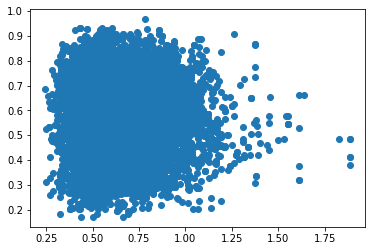

In [26]:
n = 11000
dim_param = 2

#On sépare les données en y=0/y<>0
X_0 = X[Y == 0]
X_1 = X[Y != 0]
Y_0 = Y[Y == 0]
Y_1 = Y[Y != 0]
T_0 = T[Y == 0]
T_1 = T[Y != 0]

#Création de theta = [alpha, delta]
param_0 = [0.0 for k in range(dim_param)]
param = np.array([param_0]*(n+1))

#Mise en route
for t in range(1,n+1):
    param[t] = param[t-1]
    
    #Propositions 
    Alpha = param[t][0]
    Alpha_star = rnd.normal(loc=Alpha, scale=0.4)
    Delta = param[t][1]
    Delta_star = rnd.normal(loc=Delta, scale=1.2)
    
    #Remise à l'échelle
    P = Sigmoid(Alpha)
    P_star = Sigmoid(Alpha_star)
    Theta = Sigmoid(Delta)
    Theta_star = Sigmoid(Delta_star)
    
    #Alpha
    top = (np.log(Theta + (1-Theta)*(1-P_star)**T_0)).sum() + (Y_1*np.log(P_star)+X_1*np.log(1-P_star)).sum() - Alpha_star**2/(2*1e4)
    bottom = (np.log(Theta + (1-Theta)*(1-P)**T_0)).sum() + (Y_1*np.log(P)+X_1*np.log(1-P)).sum() - Alpha**2/(2*1e4)
    proba_accep = min(1,np.exp(top-bottom))
    U = rnd.uniform(low=0,high=1)
    if U<proba_accep:
        param[t][0] = Alpha_star
        
    #Delta
    top = (np.log(Theta_star + (1-Theta_star)*(1-P)**T_0)).sum() + len(X_1)*np.log(1-Theta_star) - Delta_star**2/(2*1e4)
    bottom = (np.log(Theta + (1-Theta)*(1-P)**T_0)).sum() + len(X_1)*np.log(1-Theta) - Delta**2/(2*1e4)
    proba_accep = min(1,np.exp(top-bottom))
    U = rnd.uniform(low=0,high=1)
    if U<proba_accep:
        param[t][1] = Delta_star
    
plt.scatter(np.exp(param[:,0]),Sigmoid(param[:,1]))

Alpha = param[1001:,0]
Delta = param[1001:,1]
Beta = np.exp(param[1001:,0])
Theta = Sigmoid(param[1001:,1])
P = Sigmoid(param[1001:,0])

print(f"Alpha: mean={Alpha.mean()}, sd={Alpha.std()}, median ={np.median(Alpha)}, start=1001, sample={len(Alpha)}")
print(f"Beta: mean={Beta.mean()}, sd={Beta.std()}, median ={np.median(Beta)}, start=1001, sample={len(Beta)}")
print(f"Delta: mean={Delta.mean()}, sd={Delta.std()}, median ={np.median(Delta)}, start=1001, sample={len(Delta)}")
print(f"Theta: mean={Theta.mean()}, sd={Theta.std()}, median ={np.median(Theta)}, start=1001, sample={len(Theta)}")
print(f"P: mean={P.mean()}, sd={P.std()}, median ={np.median(P)}, start=1001, sample={len(P)}")


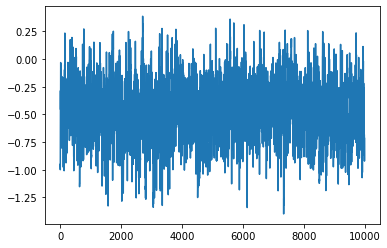

In [24]:
plt.plot(Alpha)

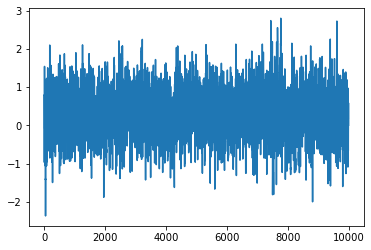

In [22]:
plt.plot(Delta)